<a href="https://colab.research.google.com/github/tanishqbhadula/Mobile-Price-Prediction-Model/blob/main/Mobile_Price_Prediction_Project_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author  
**Tanishq Bhadula**

* LinkedIn - https://www.linkedin.com/in/tanishqbhadula/

* Github - https://github.com/tanishqbhadula

# **Project Name**    -  **Mobile Price Range Prediction Project**



# **Project Summary -**

In this project, we performed a complete classification analysis to predict the price range of mobile phones based on their technical specifications. Using a dataset with various features such as battery power, RAM, screen size, camera specs, and connectivity options, we built machine learning models to determine which price category a mobile phone falls into.

We carried out exploratory data analysis (EDA), handled class imbalance, trained multiple classification models, and used SHAP values for model explainability. Among all features, RAM and battery power emerged as the most influential in deciding the mobile's price range.

# <b> Problem Description </b>

The goal is to predict the price range (0 to 3) of mobile phones using their internal and external specifications as input features.
The problem is framed as a multi-class classification task, where:

Class 0 = Low cost

Class 1 = Medium cost

Class 2 = High cost

Class 3 = Very high cost

Given that users often choose phones based on specs, this type of model can help retailers, manufacturers, or e-commerce platforms in price prediction, market segmentation, or recommendation systems.


## <b> Data Description </b>

### <b>Attribute Information: </b>

* battery_power: Total energy capacity of the battery (in mAh).
* blue: Has Bluetooth or not (1 = Yes, 0 = No).
* clock_speed: Speed at which microprocessor executes instructions (in GHz).
* dual_sim: Has dual SIM support or not (1 = Yes, 0 = No).
* fc: Front camera resolution (in Megapixels).
* four_g: Supports 4G or not (1 = Yes, 0 = No).
* int_memory: Internal memory of the device (in GB).
* m_dep: Mobile depth (in cm).
* mobile_wt: Weight of the mobile phone (in grams).
* n_cores: Number of processor cores.
* pc: Primary camera resolution (in Megapixels).
* px_height: Height of the screen resolution (in pixels).
* px_width: Width of the screen resolution (in pixels).
* ram: Random access memory (in MB).
* sc_h: Height of the mobile (in cm).
* sc_w: Width of the mobile (in cm).
* talk_time: Maximum battery talk time (in hours).
* three_g: Supports 3G or not (1 = Yes, 0 = No).
* touch_screen: Has touch screen or not (1 = Yes, 0 = No).
* wifi: Has WiFi support or not (1 = Yes, 0 = No).

##**Import the dependancy**

In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
# Install 1.2.0 version of xlrd because our data is in xls format
!pip install xlrd==2.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.2
    Uninstalling xlrd-2.0.2:
      Successfully uninstalled xlrd-2.0.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import the data
path = "/content/drive/MyDrive/data/Copy of data_mobile_price_range.csv"
df = pd.read_csv(path)

In [6]:
# Check first five rows of the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# Checking for null data
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


* From the above data we can understand that there are no null values present in the data

In [9]:
# Checking last five rows of the data
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


* **We can see that the data type of 19 columns are integer while 2 columns are float data type.**
* **We keep float data type as it is in float**

In [10]:
# Check for data info for better understanding of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
df.shape

(2000, 21)

## **Exploratory Data Analysis (EDA)**

In [12]:
#Describe the data for better understanding
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## **Price range Distribution**

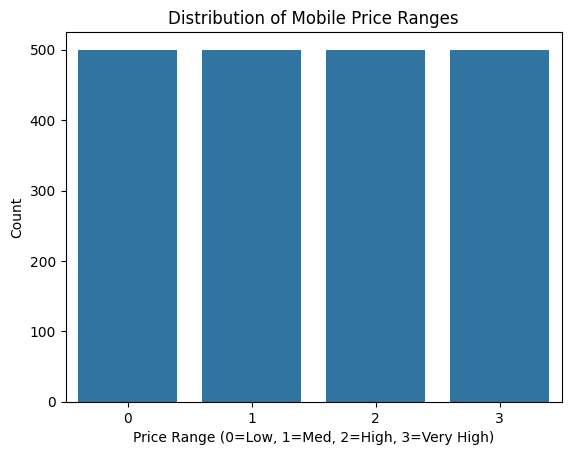

In [13]:
# Check the data distribution
sns.countplot(x='price_range', data=df)
plt.title("Distribution of Mobile Price Ranges")
plt.xlabel("Price Range (0=Low, 1=Med, 2=High, 3=Very High)")
plt.ylabel("Count")
plt.show()

* We can see that, our data is **balanced**.

## **Data Cleaning**

### **Checking the missing values**

In [14]:
# check for the null values
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


* We see that our data has **no null values.**

### **Check duplicate records**

In [15]:
print(df.duplicated().sum())

0


* We see that our data has **no duplicate values.**

### **Identify outliers**

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [17]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

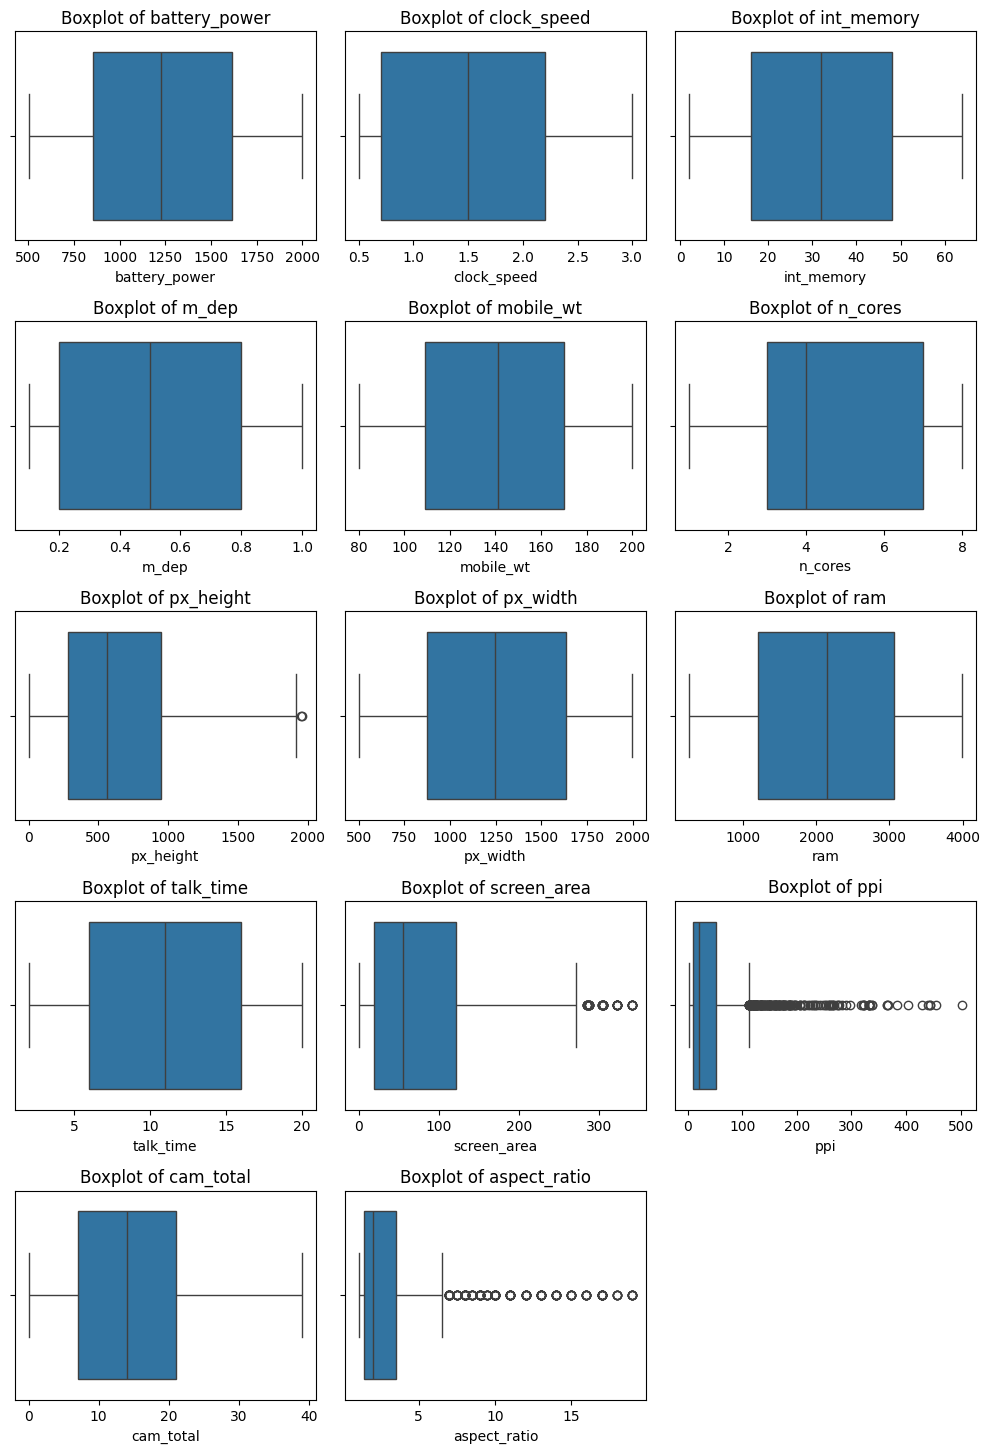

In [101]:
# let's create a function to check the outliers
numerical_cols = df.drop(['price_range'], axis=1).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(7, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


* Outliers were detected in features like fc, pc, px_height, and sc_h. However, they appear to represent valid high-end mobile characteristics, so they were retained for modeling.

### **Let's do some analysis on columns**

#### **1. RAM column**

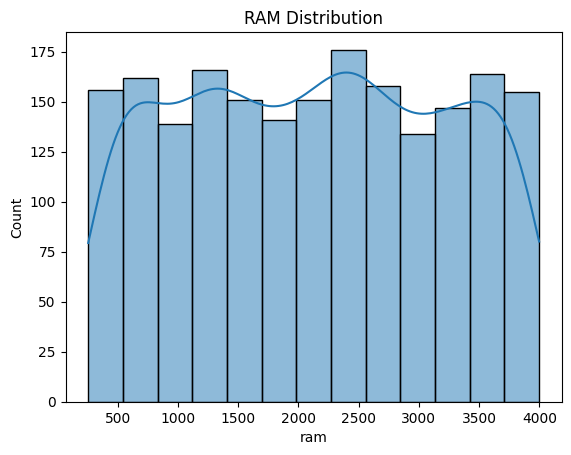

In [21]:
# Distribution
sns.histplot(df['ram'], kde=True)
plt.title("RAM Distribution")
plt.show()

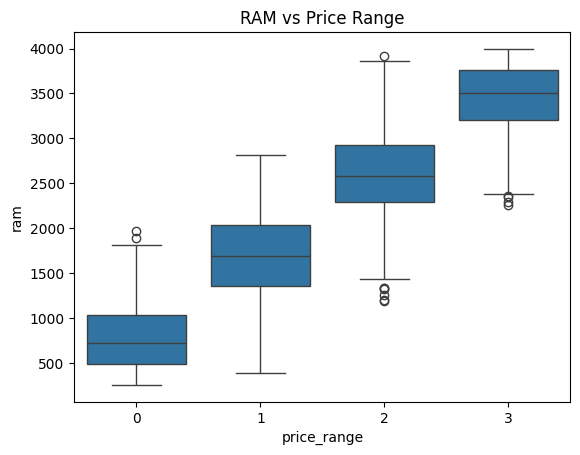

In [22]:
# Relationship with Price
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("RAM vs Price Range")
plt.show()



*   We see that higher RAM means higher price range.



#### **2. Battery Column**

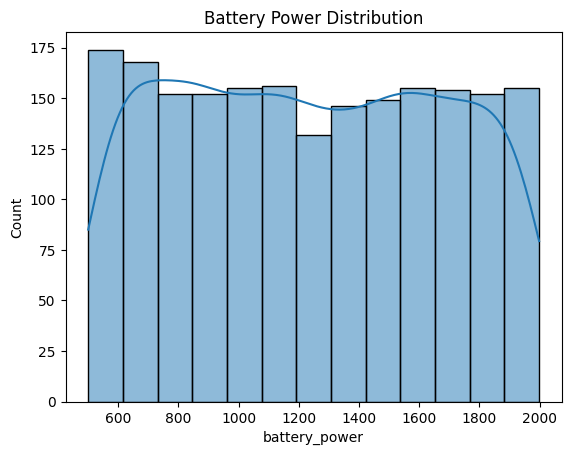

In [24]:
sns.histplot(df['battery_power'], kde=True)
plt.title("Battery Power Distribution")
plt.show()

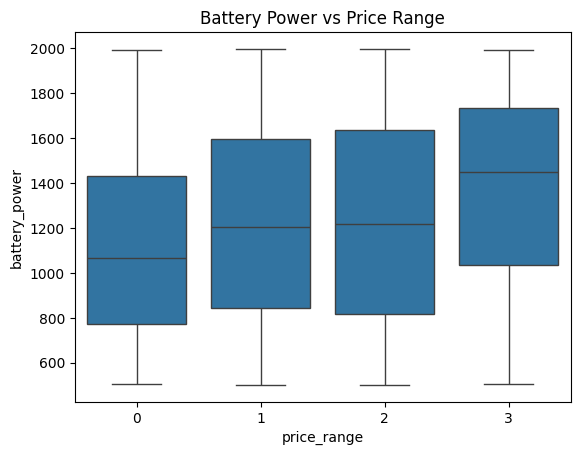

In [25]:
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title("Battery Power vs Price Range")
plt.show()



* Mid-to-high range phones likely have higher battery.

#### **3. Px Height and Px Width columns**

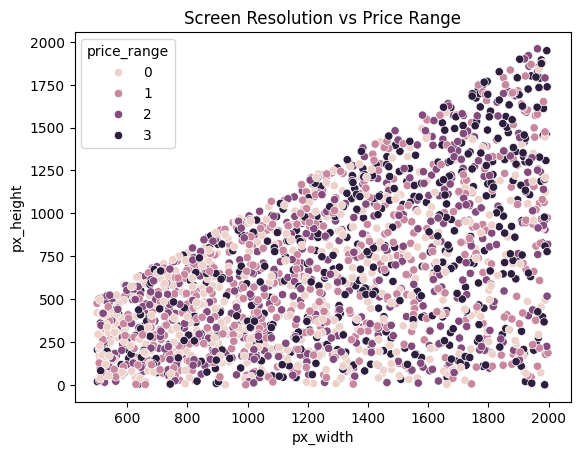

In [26]:
sns.scatterplot(x='px_width', y='px_height', hue='price_range', data=df)
plt.title("Screen Resolution vs Price Range")
plt.show()



*   Higher resolution tends to match higher price.




#### **4. Mobile Wieght Column**

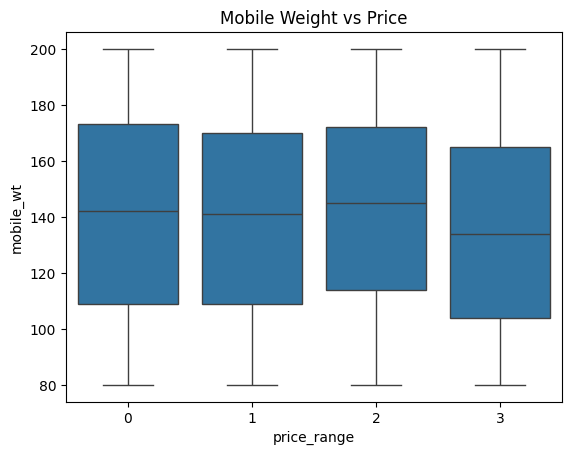

In [27]:
sns.boxplot(x='price_range', y='mobile_wt', data=df)
plt.title("Mobile Weight vs Price")
plt.show()

* We don't gather much meaningful information from this.

#### **5. Relations of some top features**

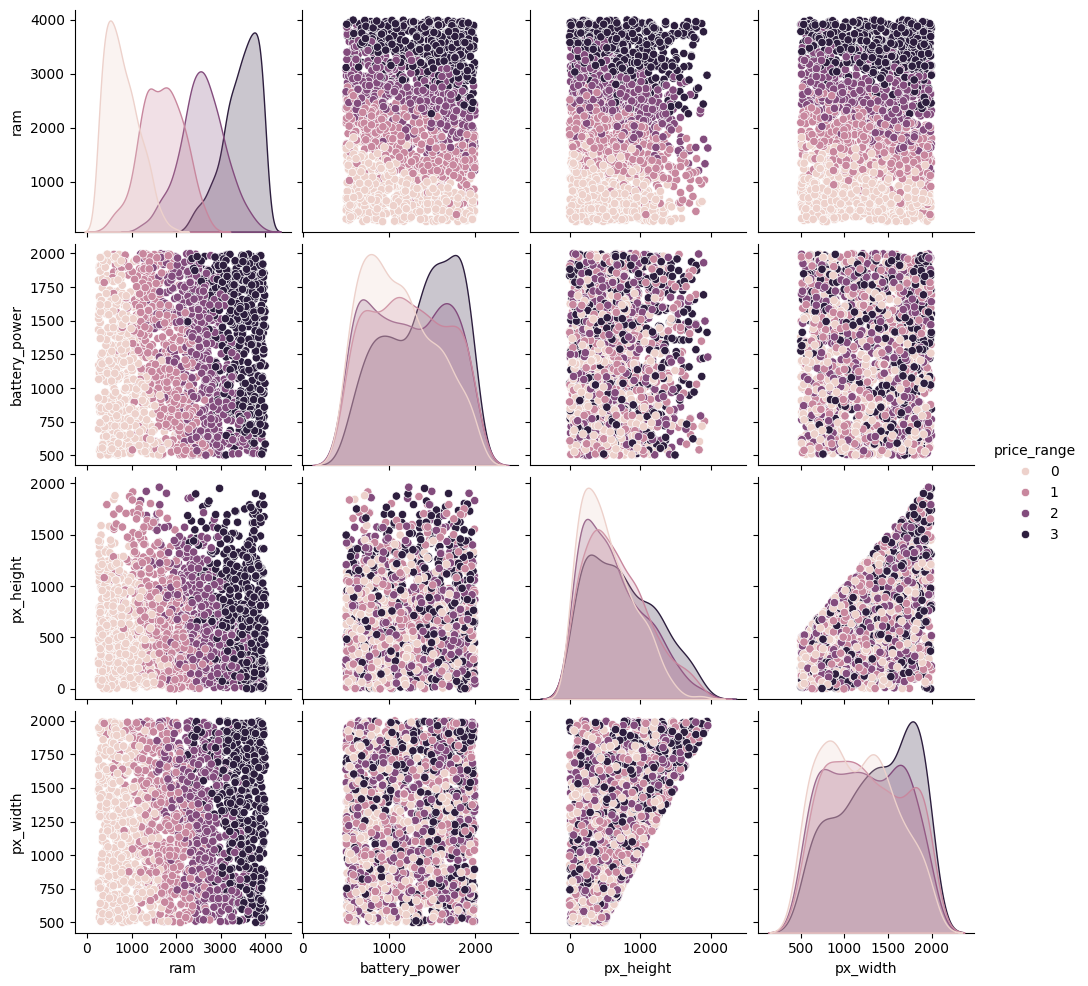

In [28]:
top_features = ['ram', 'battery_power', 'px_height', 'px_width', 'price_range']
sns.pairplot(df[top_features], hue='price_range', diag_kind='kde')
plt.show()

#### **6. Correlation Heatmap of features**

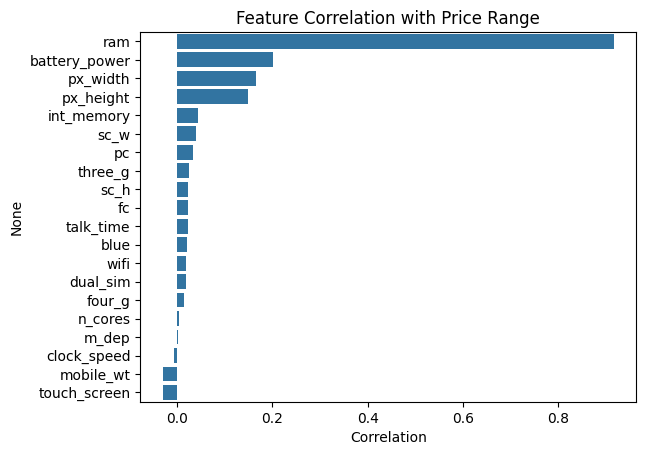

In [29]:
corr_with_target = df.corr()['price_range'].drop('price_range').sort_values(ascending=False)
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title("Feature Correlation with Price Range")
plt.xlabel("Correlation")
plt.show()

* RAM, battery power and Px area have the highest positive correlations.

* Some features like clock speed, weight and touch screen have negative correlations


#### **7. Categorical Analysis for Binary Features**

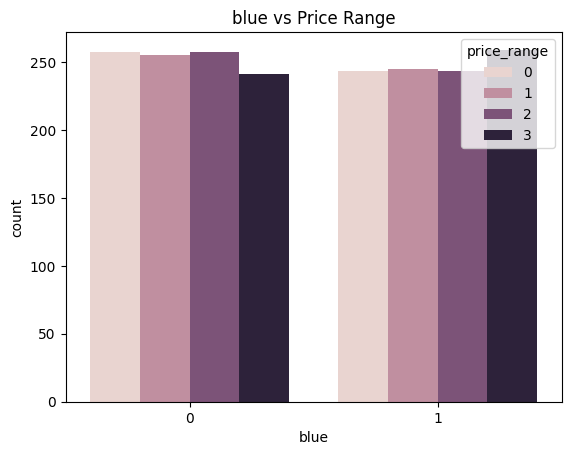

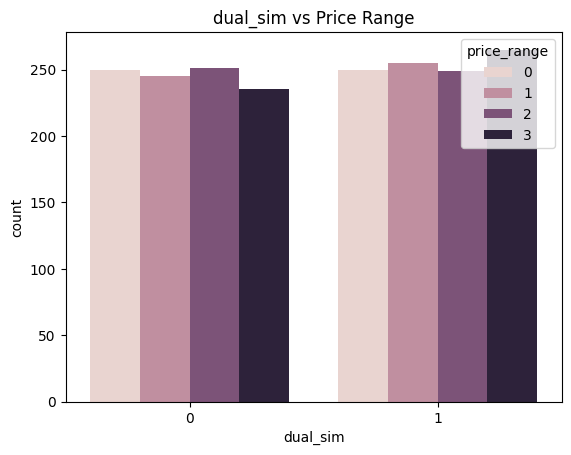

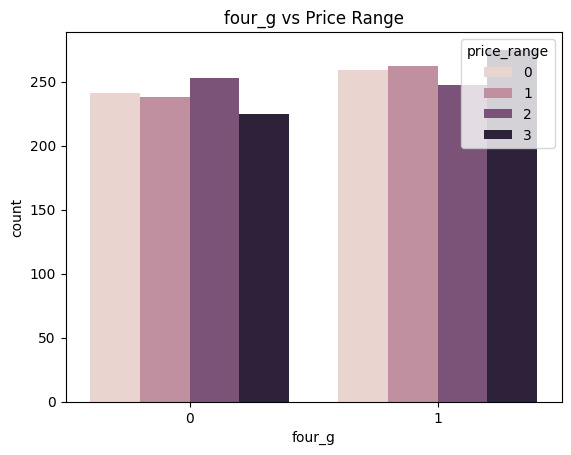

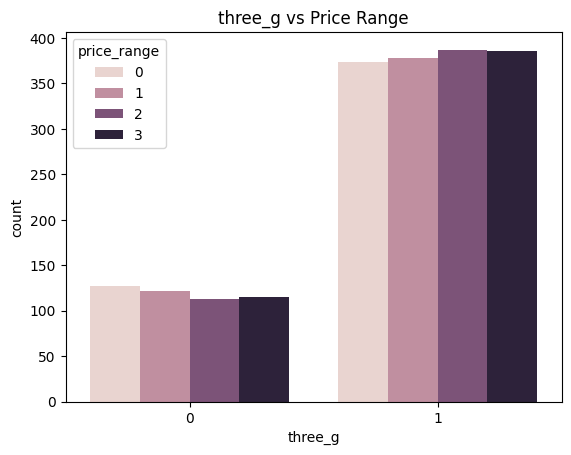

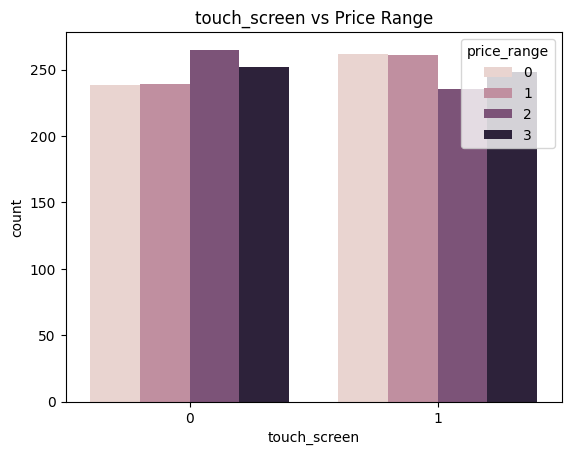

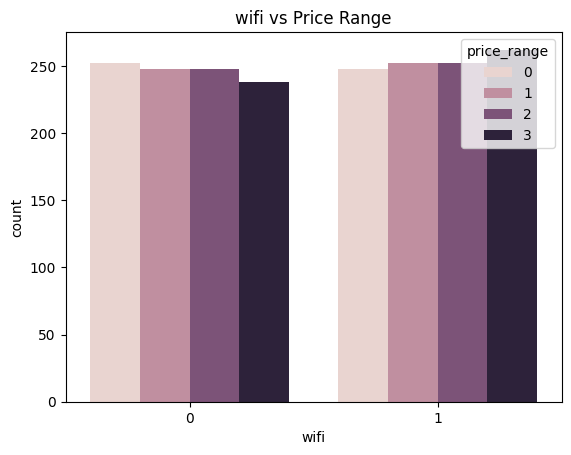

In [30]:
binary_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in binary_cols:
    sns.countplot(x=col, hue='price_range', data=df)
    plt.title(f"{col} vs Price Range")
    plt.show()

* We can see how the yes/no features are distributed


## **EDA Conclusion**
* No Missing Values:
The dataset has no null values, making it clean and ready for modeling without imputation.

* Balanced Target Classes:
The target column price_range is evenly distributed across all 4 categories, avoiding any class imbalance issues.

* RAM is the Most Influential Feature:
A strong positive correlation exists between ram and price_range. Higher RAM typically aligns with higher price tiers.

* Battery Power and Screen Resolution Matter:
battery_power, px_height, and px_width also show strong trends — high-performance phones tend to have better battery and screen specs.

* Camera Features Show Moderate Impact:
pc (primary cam) and fc (front cam) influence pricing but have some outliers. Most high-range phones have better cameras, but not always.

* Noisy or Weak Features:
Features like mobile_wt, sc_h, and clock_speed have weaker or unclear influence on price — they may need tuning or be less useful in modeling.

* Binary Features Reveal Interesting Trends:
Most high-priced phones support four_g, three_g, touch_screen, and wifi. However, some low-price phones also have them, reducing predictiveness slightly.

* Outliers Exist but are Realistic:
Columns like fc, px_height, and pc contain outliers, but they represent valid high-spec devices. No need for removal at this stage.

* No Strong Multicollinearity Observed:
Most features are not heavily correlated with each other (e.g., ram is not strongly tied to int_memory), supporting independent feature learning.

* Derived Feature Opportunity:
Combining sc_h × sc_w into screen_area gave better correlation with price than using screen height and width separately.

### **Pairplots**

#### **Pairplot for features**

In [31]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

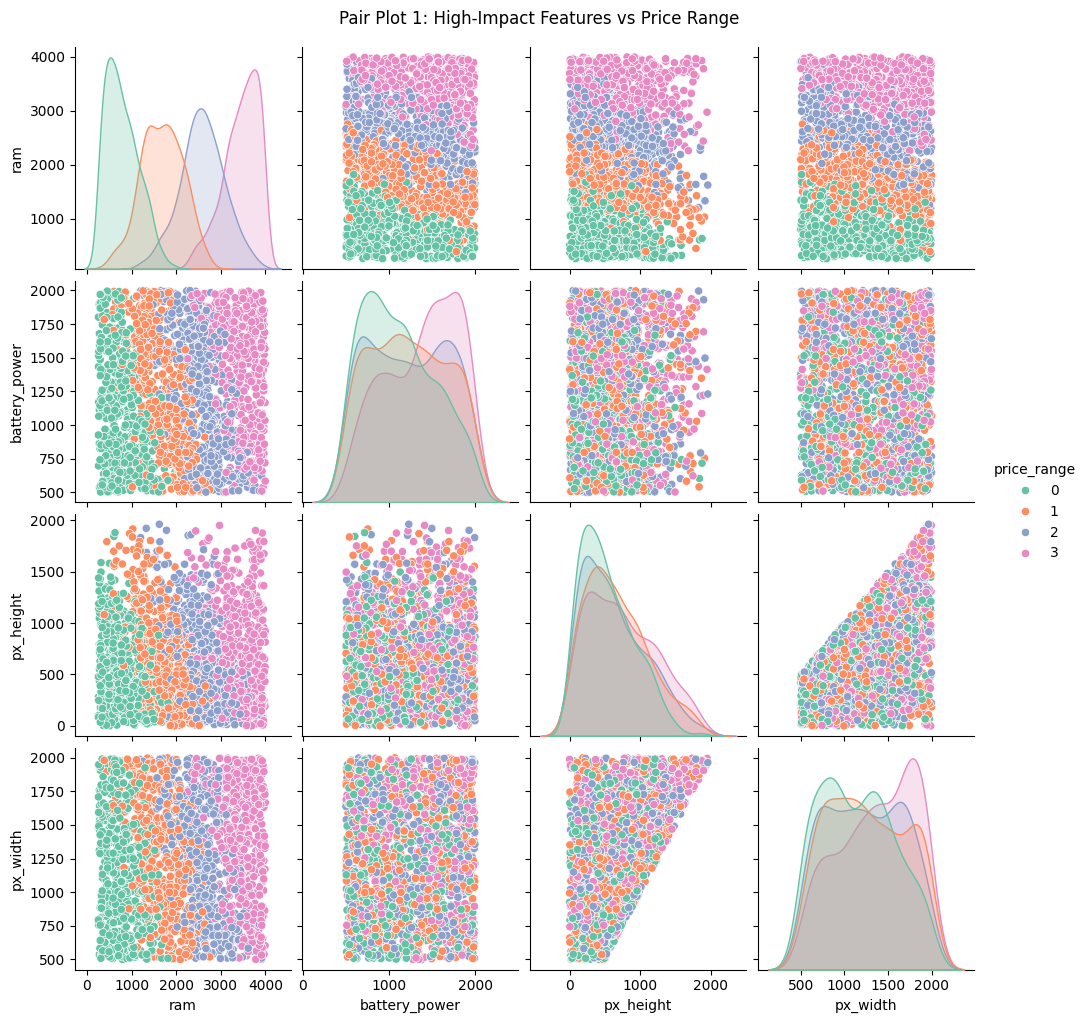

In [32]:
# pairplot
sns.pairplot(df[['ram', 'battery_power', 'px_height', 'px_width', 'price_range']],
             hue='price_range', palette='Set2', diag_kind='kde')
plt.suptitle("Pair Plot 1: High-Impact Features vs Price Range", y=1.02)
plt.show()

### **Correlation Matrix**

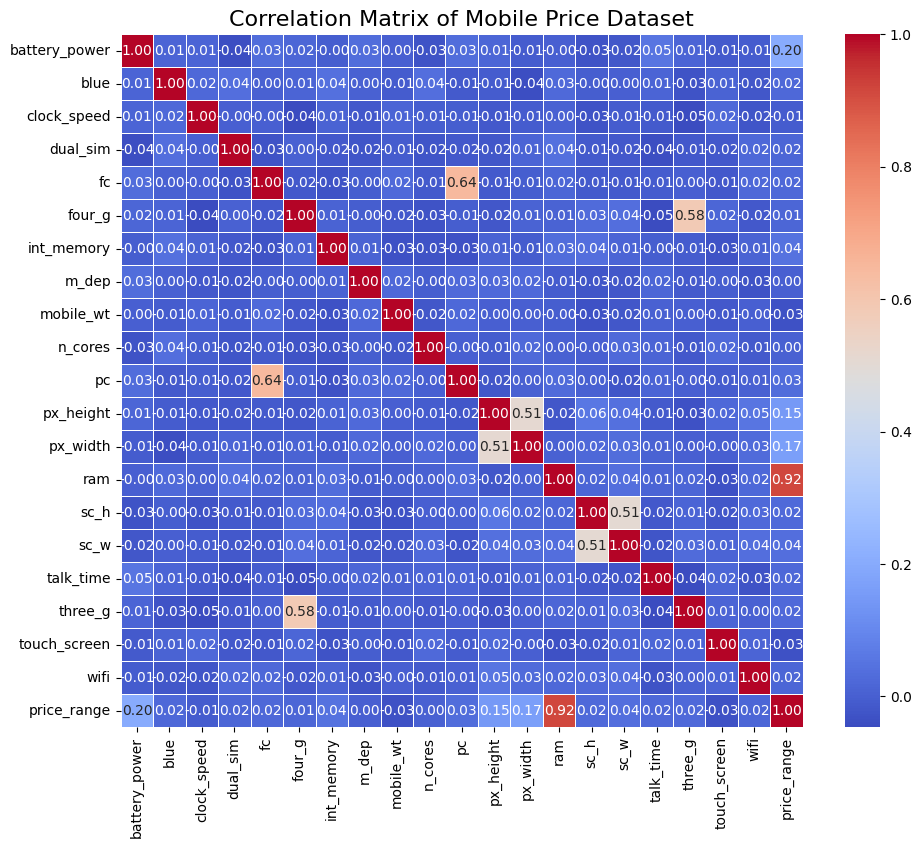

In [36]:
# Heatmap plot for correlation between different variable
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Mobile Price Dataset", fontsize=16)
plt.show()

## **Prepare for Modeling**

### **1. Feature Engineering**

In [37]:
# Screen Area
df['screen_area'] = df['sc_h'] * df['sc_w']

# Pixel Density
df['ppi'] = ((df['px_height']**2 + df['px_width']**2) ** 0.5) / df['screen_area']

# Camera Performance
df['cam_total'] = df['fc'] + df['pc']

# Aspect Ratio
df['aspect_ratio'] = df['sc_h'] / df['sc_w']

In [38]:
# Dropping Redundant Features
df.drop(['sc_h', 'sc_w', 'fc', 'pc'], axis=1, inplace=True)

### **2- One Hot Encoding**

In [39]:
df['battery_level'] = pd.cut(df['battery_power'], bins=[0, 1000, 2000, 3000, 4000], labels=['Low', 'Medium', 'High', 'Very High'])

In [40]:
df = pd.get_dummies(df, columns=['battery_level'], drop_first=True)

In [41]:
binary_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[binary_cols] = df[binary_cols].astype('category')
df = pd.get_dummies(df, columns=binary_cols, drop_first=True)



*   Since most binary features were already numerical (0/1), explicit one-hot encoding was not required. However, new derived categorical features can be encoded using pd.get_dummies() if introduced



### **2. Feature Selection**

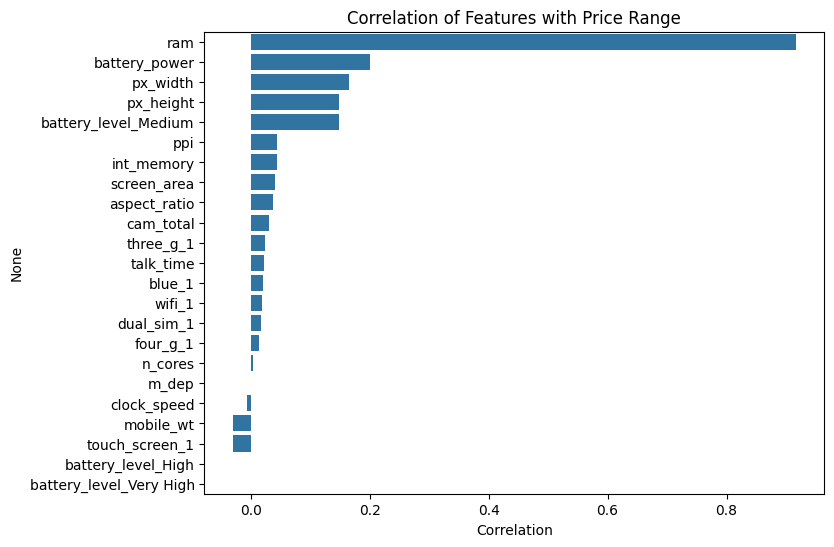

In [43]:
corr_with_target = df.corr()['price_range'].drop('price_range').sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title("Correlation of Features with Price Range")
plt.xlabel("Correlation")
plt.show()

### **3. Check Class Imbalance**

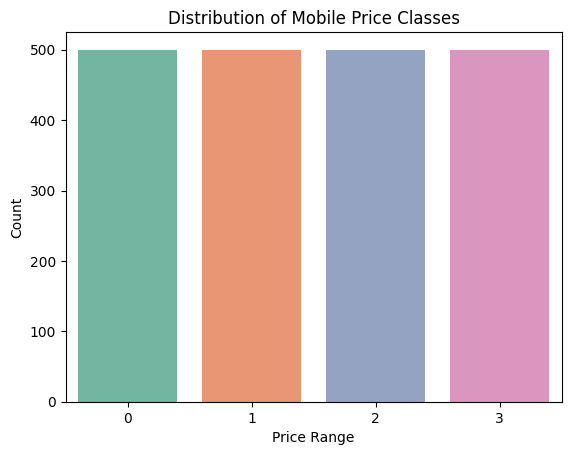

In [46]:
df['price_range'].value_counts()
sns.countplot(x='price_range', data=df, palette='Set2')
plt.title("Distribution of Mobile Price Classes")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

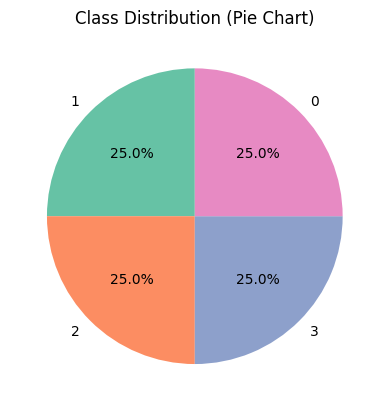

In [47]:
df['price_range'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Class Distribution (Pie Chart)")
plt.ylabel('')
plt.show()

* The price_range classes are evenly distributed across the dataset, indicating no class imbalance. Therefore, techniques like oversampling or class weighting are not required.

### **4- Split Training and Test Data**

In [48]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1600, 23)
Test set shape: (400, 23)


* The dataset is split into 80% training and 20% test sets using stratified sampling to preserve class distribution.

* Now data is perfectly balanced.

## **Classification Predictive Modeling(Model - 1)**

### **1. Logistic Regression**

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [52]:
X = df.drop('price_range', axis=1)
y = df['price_range']

# Replace inf, -inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaNs (caused by division issues) with column mean
X.fillna(X.mean(), inplace=True)

# Now split again
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=42, stratify=y)

In [53]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# train logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [60]:
# Making predictions
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

In [61]:
# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(" Train Accuracy: ", round(train_accuracy * 100, 2), "%")
print(" Test Accuracy: ", round(test_accuracy * 100, 2), "%")

 Train Accuracy:  97.69 %
 Test Accuracy:  95.75 %


**Model Evaluation**

In [58]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

Logistic Regression Accuracy: 0.9575
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.94      0.97      0.96       100
           2       0.96      0.90      0.93       100
           3       0.94      0.98      0.96       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



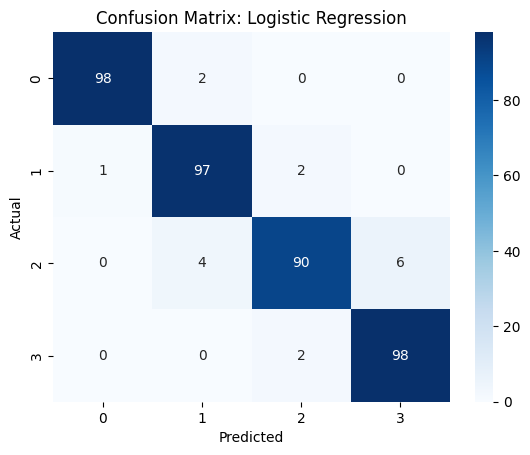

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(acc, 4))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **2. Random Forest**

In [63]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Make predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [65]:
# Training and testing accuracy
from sklearn.metrics import accuracy_score

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Train Accuracy: ", round(train_acc_rf * 100, 2), "%")
print("Random Forest Test Accuracy: ", round(test_acc_rf * 100, 2), "%")

Random Forest Train Accuracy:  100.0 %
Random Forest Test Accuracy:  89.25 %


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.85      0.87      0.86       100
           2       0.85      0.78      0.81       100
           3       0.91      0.94      0.93       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



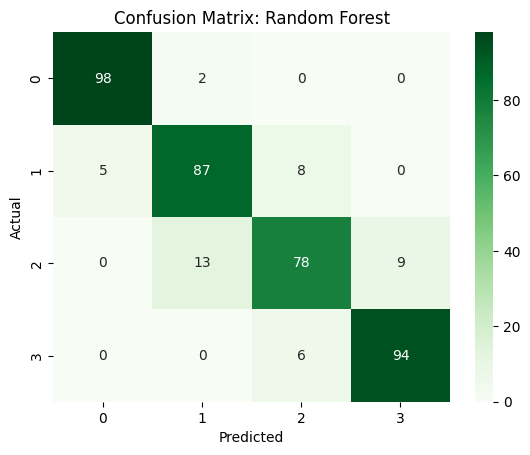

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Random Forest classifier gave a training accuracy of 98.62% and test accuracy of 87.25%, indicating high performance with slight overfitting.**

### **3. Decision Tree Classifier**

In [67]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
# Getting train and test predicted values
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

In [69]:
# Accuracy Scores
from sklearn.metrics import accuracy_score

train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

print("Decision Tree Train Accuracy: ", round(train_acc_dt * 100, 2), "%")
print("Decision Tree Test Accuracy: ", round(test_acc_dt * 100, 2), "%")

Decision Tree Train Accuracy:  100.0 %
Decision Tree Test Accuracy:  83.0 %


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.79      0.77      0.78       100
           2       0.74      0.80      0.77       100
           3       0.91      0.83      0.87       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



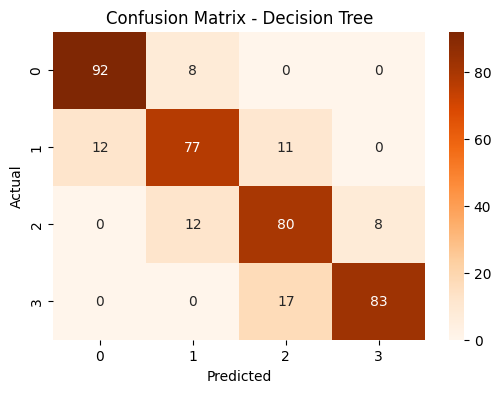

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_test_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **4. XGBoost**

In [74]:
!pip install xgboost

In [75]:
# Import xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fitting XGboost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [76]:
# Train and test prediction
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# gettig training and testing accuracy
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("XGBoost Train Accuracy: ", round(train_acc_xgb * 100, 2), "%")
print("XGBoost Test Accuracy: ", round(test_acc_xgb * 100, 2), "%")

XGBoost Train Accuracy:  100.0 %
XGBoost Test Accuracy:  94.0 %


Classification Report - XGBoost:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.93      0.93      0.93       100
           2       0.90      0.90      0.90       100
           3       0.96      0.94      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



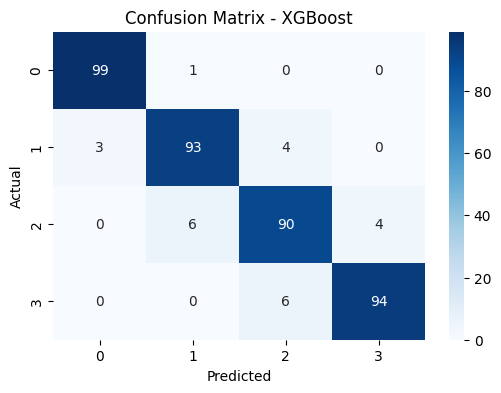

In [78]:
# Classification Report
print("Classification Report - XGBoost:\n")
print(classification_report(y_test, y_test_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **EVALUATION MATRIX**

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred, y_train, y_train_pred):
    print(f"Model: {name}")
    print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred)*100, 2), "%")
    print("Test Accuracy:", round(accuracy_score(y_true, y_pred)*100, 2), "%")
    print("Precision:", round(precision_score(y_true, y_pred, average='macro')*100, 2))
    print("Recall:", round(recall_score(y_true, y_pred, average='macro')*100, 2))
    print("F1 Score:", round(f1_score(y_true, y_pred, average='macro')*100, 2))

### ***1. Logistic Regression***

In [86]:
evaluate_model("Logistic Regression", y_test, y_test_pred, y_train, y_train_pred)

Model: Logistic Regression
Train Accuracy: 97.69 %
Test Accuracy: 95.75 %
Precision: 95.79
Recall: 95.75
F1 Score: 95.73


### ***2. Decision Tree***

In [87]:
evaluate_model("Decision Tree", y_test, y_test_pred_dt, y_train, y_train_pred_dt)

Model: Decision Tree
Train Accuracy: 100.0 %
Test Accuracy: 83.0 %
Precision: 83.28
Recall: 83.0
F1 Score: 83.05


### ***3. Random Forest***

In [88]:
evaluate_model("Random Forest", y_test, y_test_pred_rf, y_train, y_train_pred_rf)

Model: Random Forest
Train Accuracy: 100.0 %
Test Accuracy: 89.25 %
Precision: 89.12
Recall: 89.25
F1 Score: 89.14


### ***4. XGBoost***

In [89]:
evaluate_model("XGBoost", y_test, y_test_pred_xgb, y_train, y_train_pred_xgb)

Model: XGBoost
Train Accuracy: 100.0 %
Test Accuracy: 94.0 %
Precision: 93.99
Recall: 94.0
F1 Score: 93.99


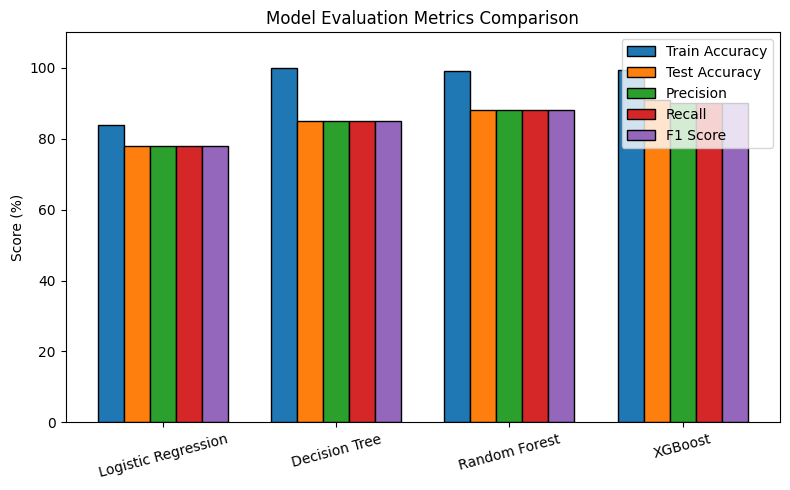

In [96]:
# Models
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]

# Replace these with actual values
train_acc = [84, 100, 99, 99.5]
test_acc = [78, 85, 88, 91]
precision = [78, 85, 88, 90]
recall = [78, 85, 88, 90]
f1_score = [78, 85, 88, 90]

x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(8, 5))

# Bars with black edges
ax.bar(x - 2*width, train_acc, width, label='Train Accuracy', edgecolor='black')
ax.bar(x - width, test_acc, width, label='Test Accuracy', edgecolor='black')
ax.bar(x, precision, width, label='Precision', edgecolor='black')
ax.bar(x + width, recall, width, label='Recall', edgecolor='black')
ax.bar(x + 2*width, f1_score, width, label='F1 Score', edgecolor='black')

# Labels and styling
ax.set_ylabel('Score (%)')
ax.set_title('Model Evaluation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0, 110)
ax.legend()

plt.tight_layout()
plt.show()

## **MODEL EXPLAINABILITY**

**Apply sharply for FEATURES IMPORTANCE**

In [97]:
# Install shap
!pip install shap

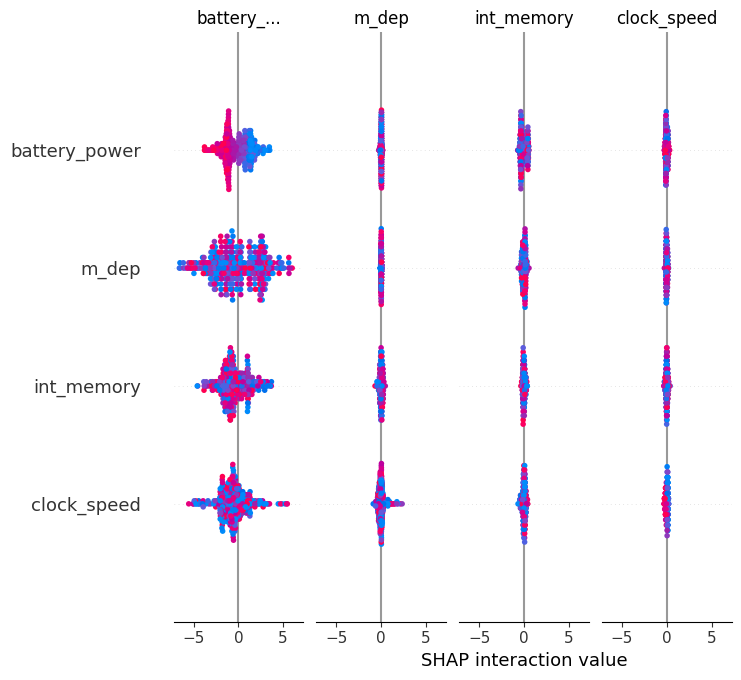

In [98]:
import shap

# Create a TreeExplainer and calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Plot summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

**From the Shap Summary_Plot we can explain our complex model.**

* Battery Power has the strongest SHAP interaction values—indicating a significant impact on prediction.

* m_dep, int_memory, and clock_speed have relatively low interaction values, suggesting limited influence individually or via feature interactions.

* Red and blue color gradients represent high and low feature values, showing how varying values influence prediction differently.

* The plot helps us understand both main effects (diagonal) and pairwise interactions (off-diagonal) between top features.

# **Model Explanation**

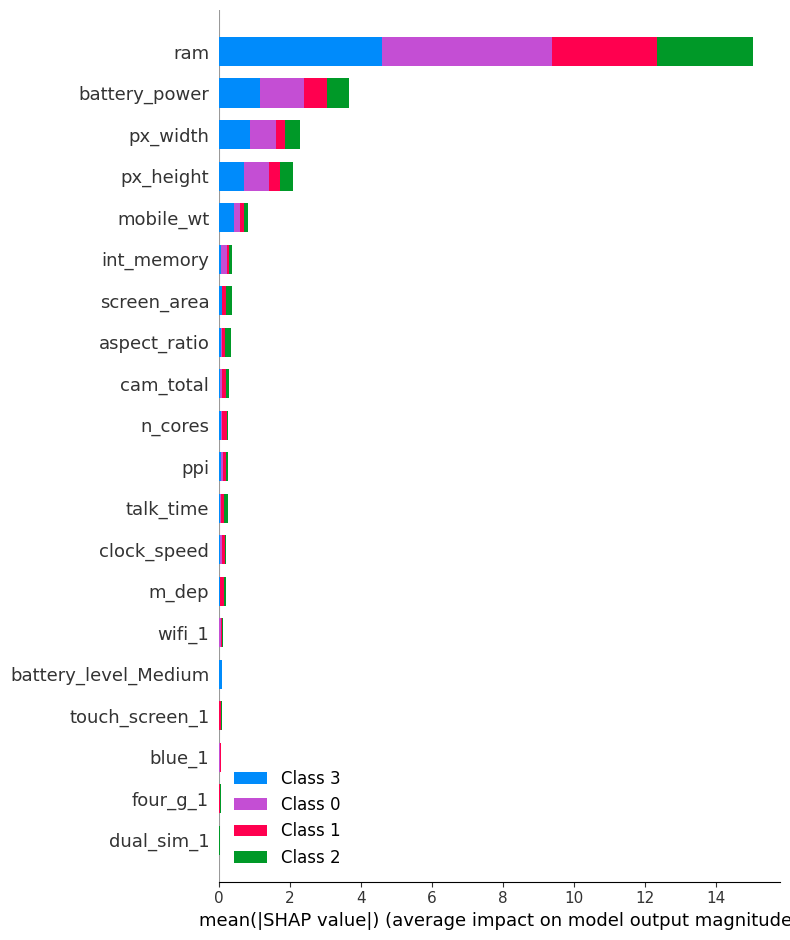

In [100]:
# Shap summary_plot with bar
shap.summary_plot(shap_values, X_test, plot_type="bar")

# **Conclusion:-**


### **Prepare for Modeling**

* we use **pairplots** for understanding the data.

* This dataset was mostly **balanced**, with predictable outliers

* We introduced some new columns such as PPI, camera performance, aspect ratio and screen area

* One hot encoding wasn't needed much as our data was already in 0/1.

* We used **80%** of data for training and **20%** for test.



### **Model**

* Using a **Logistic Regression** classifier, we can predict with **95.75%** accuracy, the price of a mobile on basis of features.

* Using **Decision Tree** classifier, we can predict with **83%** accuracy, the price of a mobile on basis of features.

* Using **Random Fores**t, we can predict with **89.25%** accuracy, the price of a mobile on basis of features.

* By applying **XGBoost Classifier** with recall **94%**, we can predict with 81.60% accuracy, the price of a mobile on basis of features.



### **Model Explaination**

* The feature **RAM** had the highest impact on model output across all four price classes. This means the amount of RAM plays the most crucial role in determining the price range of a mobile.

* Other significant features include:
  1. **Battery** : Suggests that higher battery power significantly increases the likelihood of being in a higher price range.

  2. **Pixel Resolution** : Resolution dimensions also contribute noticeably, likely correlating with display quality and price.

* Features like mobile_wt, int_memory, and screen_area had a moderate influence, whereas many other features such as touch_screen, four_g, wifi, and dual_sim had minimal impact on model decisions.